In [59]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [50]:
filename = "Pokemon.csv"
df = pd.read_csv(filename)
df2= pd.read_csv("PokemonTypes.csv")
#df.rename(columns={'Type 1': 'type1', 'Type 2': 'type2', 'Sp. Atk': 'sp_attack', 'Sp. Def': 'sp_defense'}, inplace=True)
df2.head()



,abilities,against_bug,against_dark,...,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,...,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,...,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,...,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,...,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,...,19.0,1,0


In [87]:
df3 = df2[df2.columns[1:19]]
df2['resistence_score'] = df3.sum(axis=1)
df2['resistence_score'].min()

13.25

In [112]:
prop_off = df2['attack'] + df2['sp_attack'] + df2['speed']
df2['offense_score'] = prop_off

prop_def = df2['sp_defense'] + df2['defense'] + df2['hp']
df2['defense_score'] = prop_def




df4 = pd.DataFrame({'name':df2['name'], 'type1': df2['type1'], 'type2': df2['type2'], 'resistence': df2['resistence'], 
                    'balance': df2['offense_score']/df2['defense_score'], 'base_total': df2['base_total']})

pd.set_option('display.max_columns', None)
df4.sort_values(by= ['resistence'])[0:50]







,name,type1,type2,resistence,balance,base_total
800,Magearna,steel,fairy,13.25,0.935484,600
706,Klefki,steel,fairy,13.25,1.000000,470
302,Mawile,steel,fairy,13.25,0.777778,480
796,Celesteela,steel,flying,13.50,0.893688,570
226,Skarmory,steel,flying,13.50,0.690909,465
680,Aegislash,steel,ghost,14.25,2.250000,520
679,Doublade,steel,ghost,14.25,0.736434,448
678,Honedge,steel,ghost,14.25,0.785714,325
482,Dialga,steel,dragon,14.25,1.125000,680
394,Empoleon,water,steel,14.50,0.941392,530


In [111]:
# Remove Megas from dataset

In [65]:
playable_pokemon = df[df['Total'] > 450]
playable_pokemon[0:20]

,#,Name,Type 1,...,Speed,Generation,Legendary
2,3,Venusaur,Grass,...,80,1,False
3,3,VenusaurMega Venusaur,Grass,...,80,1,False
6,6,Charizard,Fire,...,100,1,False
7,6,CharizardMega Charizard X,Fire,...,100,1,False
8,6,CharizardMega Charizard Y,Fire,...,100,1,False
11,9,Blastoise,Water,...,78,1,False
12,9,BlastoiseMega Blastoise,Water,...,78,1,False
19,15,BeedrillMega Beedrill,Bug,...,145,1,False
22,18,Pidgeot,Normal,...,101,1,False
23,18,PidgeotMega Pidgeot,Normal,...,121,1,False


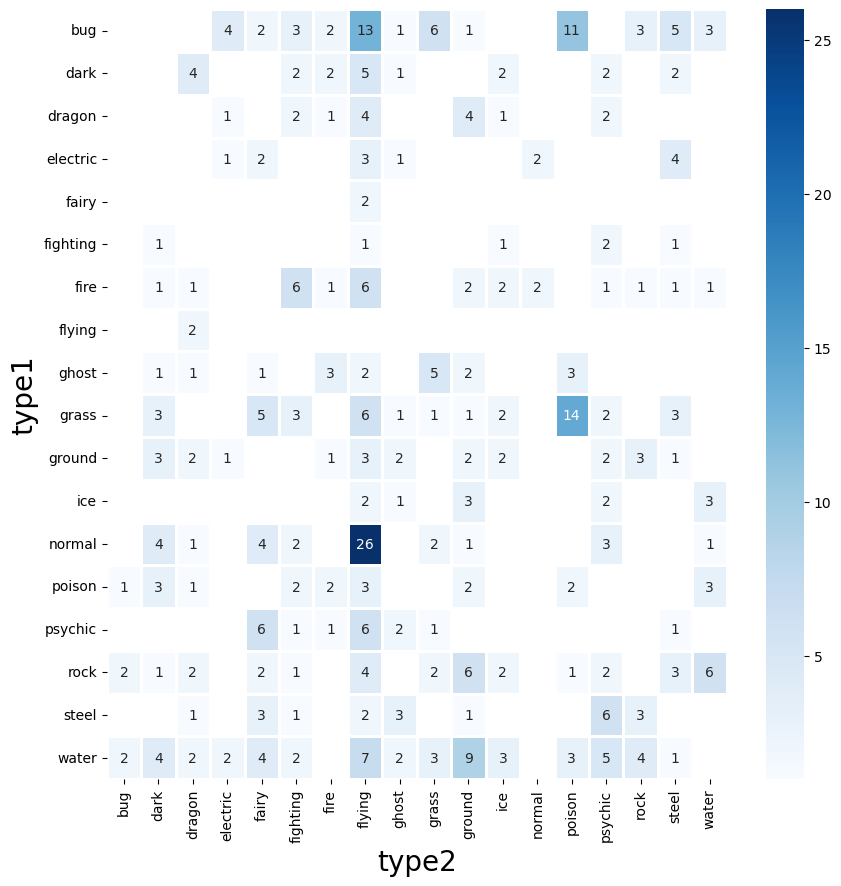

In [52]:
plt.subplots(figsize=(10, 10))

sns.heatmap(
    df2[df2['type2'] != 'None'].groupby(['type1', 'type2']).size().unstack(),
    linewidths = 1,
    annot = True,
    cmap = "Blues" # color
)

# plt.xticks(rotation = 35)
plt.show()

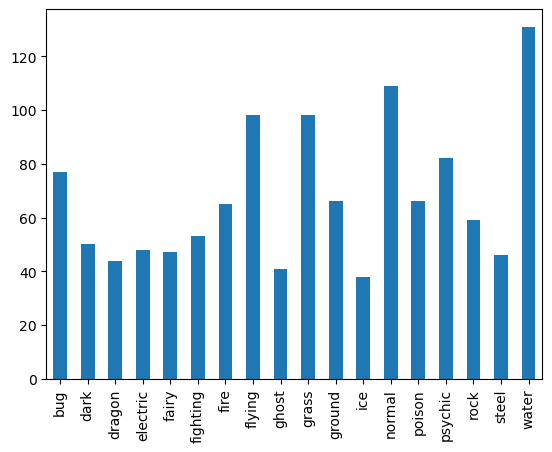

In [53]:
## Now there's a lot more flying types, so let's combine them
df2.type1.value_counts() + df2.type2.value_counts()

## and the accurate plot, keep in mind not every pokemon has 2 types
(df2.type1.value_counts() + df2.type2.value_counts()).plot.bar()
plt.show()

In [55]:
data = {
    'attack': df2['attack'],
    'defense': df2['defense'],
    'sp_attack': df2['sp_attack'],
    'sp_defense': df2['sp_defense'],
    'type2': df2.type2,
    'type1': df2['type1']
}
data = pd.DataFrame(data)
## look for columns with 'against' and join them
data = df2.filter(like='against').join(data) 

X = data.drop('type1', axis=1)
y = data['type1']
print(list(X))
X

['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'defense', 'sp_attack', 'sp_defense', 'type2']


,against_bug,against_dark,against_dragon,...,sp_attack,sp_defense,type2
0,1.00,1.0,1.0,...,65,65,poison
1,1.00,1.0,1.0,...,80,80,poison
2,1.00,1.0,1.0,...,122,120,poison
3,0.50,1.0,1.0,...,60,50,NaN
4,0.50,1.0,1.0,...,80,65,NaN
...,...,...,...,...,...,...,...
796,0.25,1.0,0.5,...,107,101,flying
797,1.00,1.0,0.5,...,59,31,steel
798,2.00,0.5,2.0,...,97,53,dragon
799,2.00,2.0,1.0,...,127,89,NaN


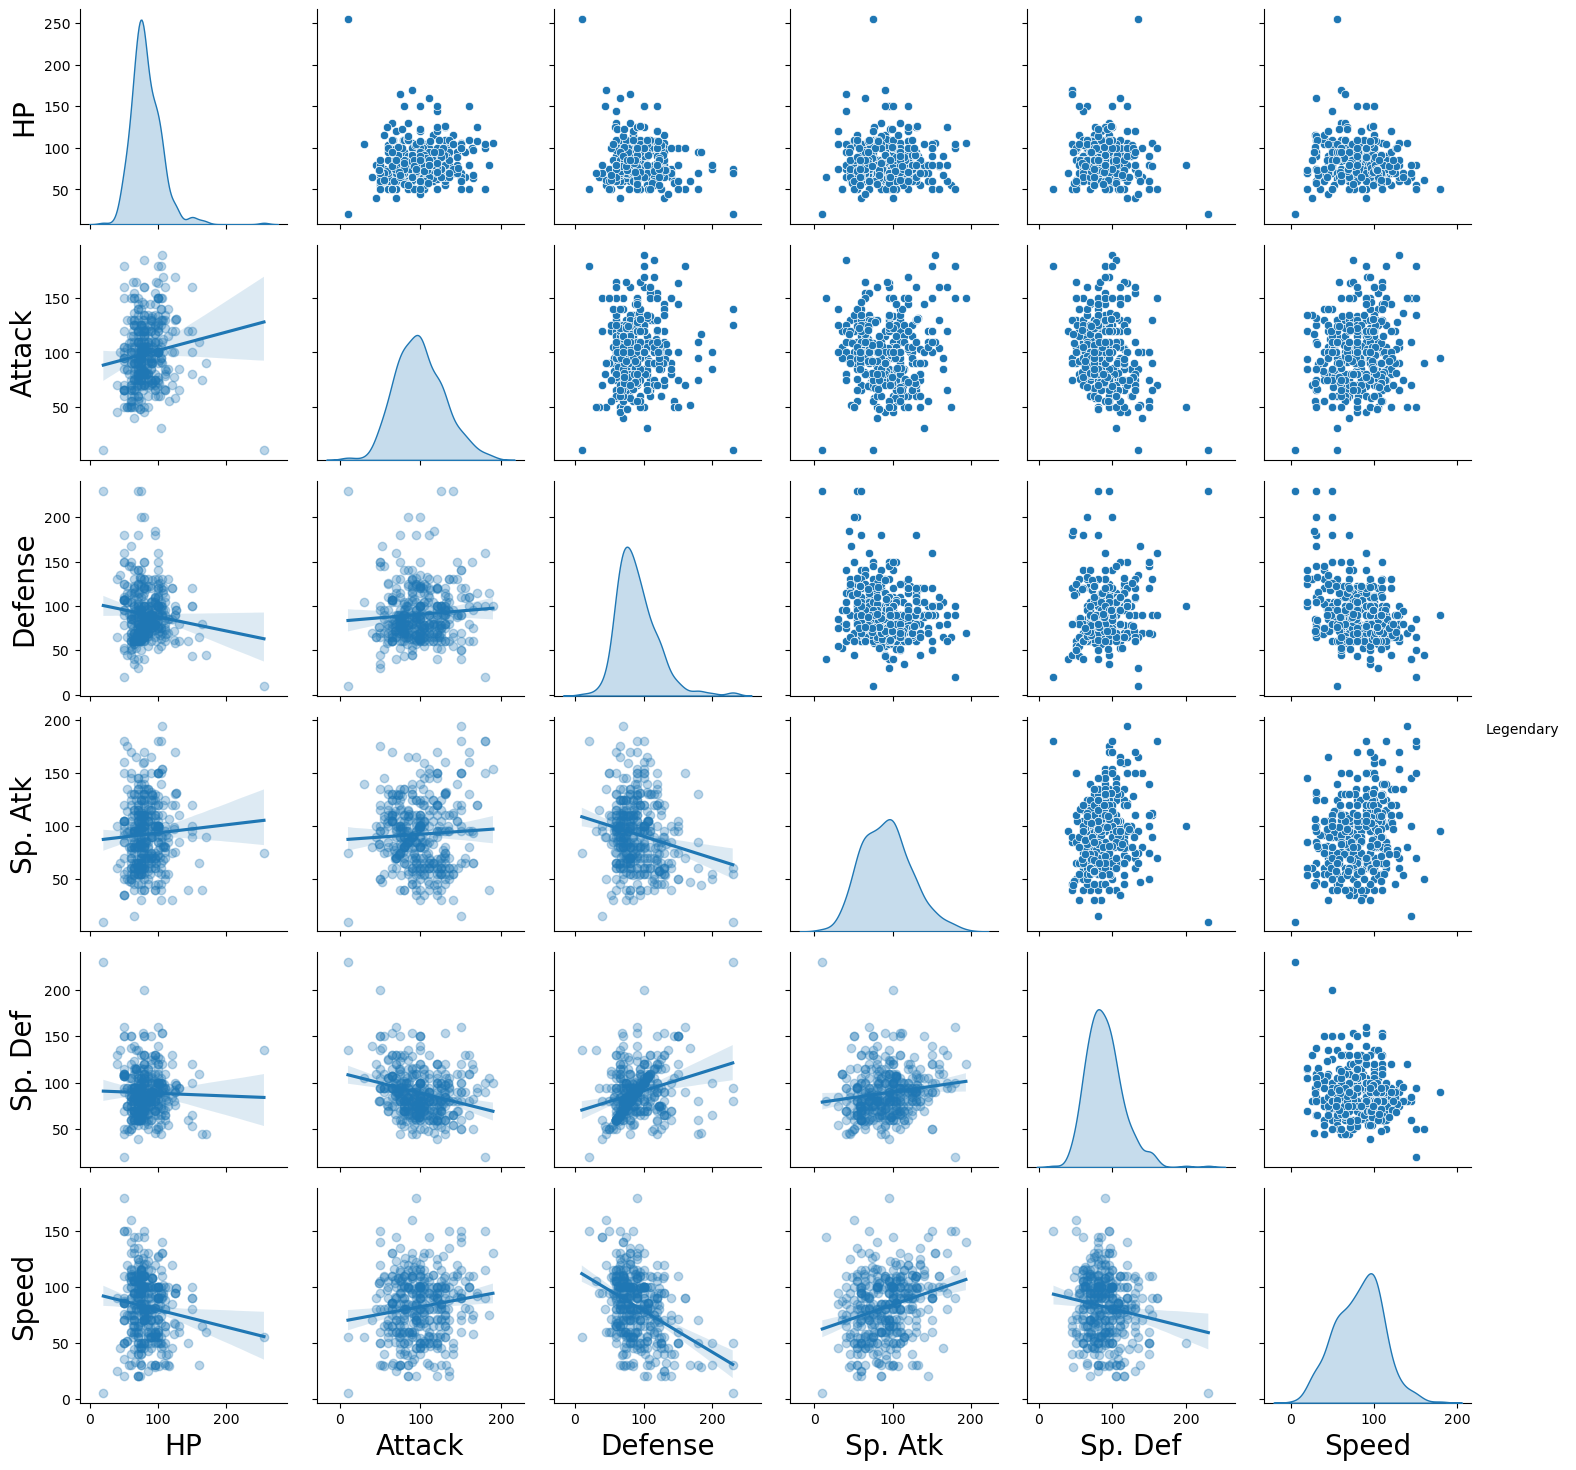

In [110]:
def my_pairgrid(input_df):
    mpl.rcParams["axes.labelsize"] = 20 #Increases the axis titles and the legend size
    g = sns.PairGrid(input_df, vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
    g = g.map_diag(sns.kdeplot, shade=True)
    g = g.map_lower(sns.regplot, scatter_kws={'alpha':0.3})
    g.hue_vals = input_df["Legendary"]
    g.hue_names = input_df["Legendary"].unique()
    g.palette = sns.color_palette("Set2", len(g.hue_names))
    g = g.map_upper(sns.scatterplot).add_legend(title='Legendary', fontsize= 14)
    return(g)
_ = my_pairgrid(playable_pokemon)
plt.show()

## Speed is postively correlated with attack and SP. Atk
## Speed is also negatively correlated with HP, def and SP.def
## Def & Sp. Def are positively correlated. Therefore pokemon can be categoried as either offensive or defensive.

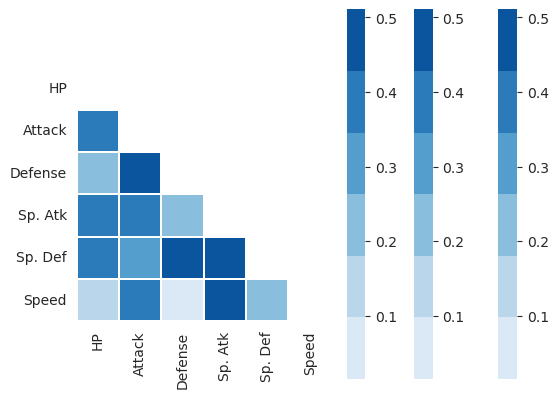

In [62]:
my_corr = df.loc[:, 'HP':'Speed'].corr() 
mask = np.zeros_like(my_corr) 
mask[np.triu_indices_from(mask)] = True ## This part is to blank out the upper diagonal
with sns.axes_style("white"):
     ax = sns.heatmap(my_corr, mask=mask, square=True, cmap=sns.color_palette("Blues"), vmax=np.max(np.sort(my_corr.values)[:,-2]), linewidths=0.3)
plt.show()